In [1]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-sdhpbiiz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-sdhpbiiz
  Resolved https://github.com/huggingface/diffusers.git to commit 61916fefc400d1b77171490b6ff7d53e509ed9de
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.4 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffus

In [2]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

# Stable Diffusion v2のモデル名
model_id = "stabilityai/stable-diffusion-2"

# ノイズスケジューラ
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
# 重みのダウンロード & モデルのロード
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
# GPU使用。（CPUだと生成にかなり時間かかります。というかいつ終わるのか不明。）
pipe = pipe.to("cuda")

# 入力テキスト
prompt = "a trash box has round eyes easting trash in the house"
image = pipe(prompt).images[0]

vae/diffusion_pytorch_model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

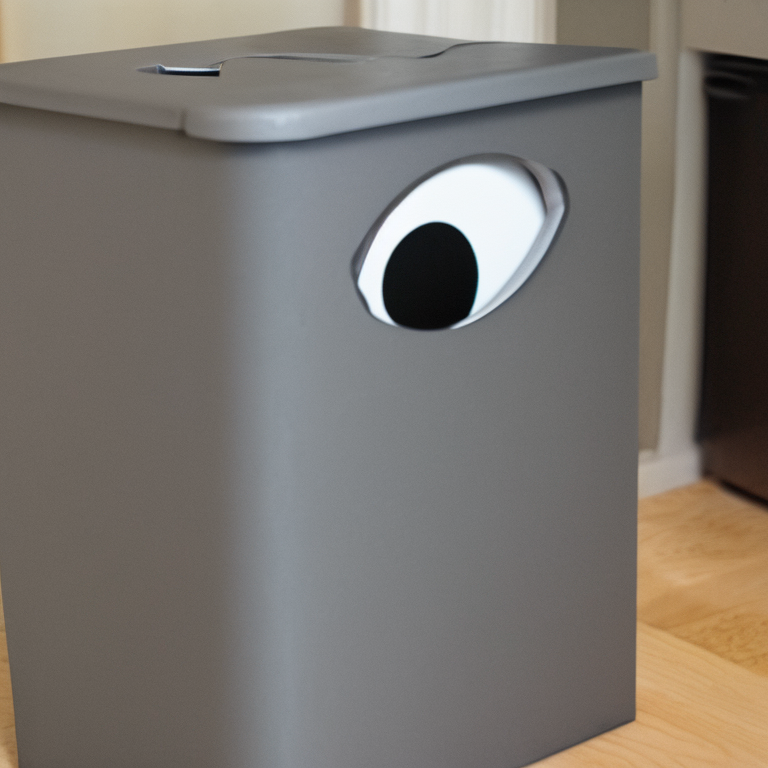

In [3]:
image